from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

In [2]:
import pandas as pd
import numpy as np
import warnings

# Option 1: Suppress all warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# if the Breast Cancer dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df = pd.read_csv('wdbc.data', header=None)

print(df.tail(10))
print(df.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
y = le.fit_transform(y)
print(le.classes_)
print(le.inverse_transform(y))

         0  1      2      3       4       5        6        7        8   \
559  925291  B  11.51  23.93   74.52   403.5  0.09261  0.10210  0.11120   
560  925292  B  14.05  27.15   91.38   600.4  0.09929  0.11260  0.04462   
561  925311  B  11.20  29.37   70.67   386.0  0.07449  0.03558  0.00000   
562  925622  M  15.22  30.62  103.40   716.9  0.10480  0.20870  0.25500   
563  926125  M  20.92  25.09  143.00  1347.0  0.10990  0.22360  0.31740   
564  926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565  926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566  926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567  927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568   92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26       27      28  \
559  0.04105  ...  12.480  37.16   82.28   474.2  0.12980  0.25170  0.3630   
560  0.04304  ... 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
forest = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
pipe_lr.score(X_test, y_test)

0.9824561403508771

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)

    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 1.000
Fold: 02, Class distr.: [256 153], Acc.: 0.978
Fold: 03, Class distr.: [256 153], Acc.: 1.000
Fold: 04, Class distr.: [256 153], Acc.: 0.978
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.978
Fold: 09, Class distr.: [257 153], Acc.: 1.000
Fold: 10, Class distr.: [257 153], Acc.: 1.000

CV accuracy: 0.980 +/- 0.021


In [5]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [1.         0.97826087 1.         0.97826087 0.93478261 0.95555556
 0.97777778 0.97777778 1.         1.        ]
CV accuracy: 0.980 +/- 0.021


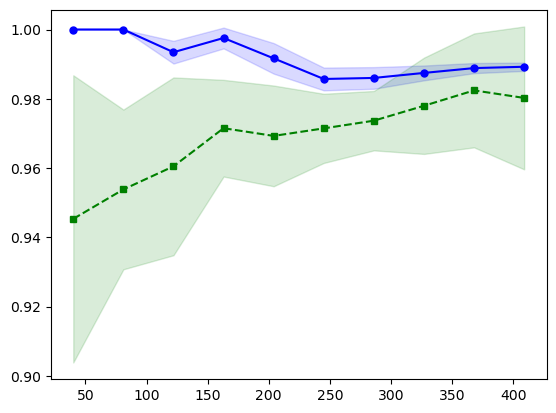

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

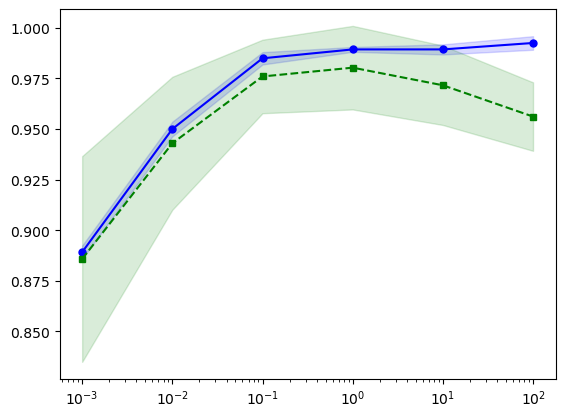

In [7]:
from sklearn.model_selection import validation_curve
param_range = 10.0 ** (np.arange(-3, 3, 1))
train_scores, test_scores = validation_curve(estimator=pipe_lr, X = X_train, y = y_train, param_name='logisticregression__C', param_range=param_range.tolist(), cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.xscale('log')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = 10.0 ** (np.arange(-4, 4, 1))
param_range = param_range.tolist()
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']}, {'svc__C':param_range, 'svc__gamma':param_range, 'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv = 10, refit = True, n_jobs = -1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_estimator_)
gs.score(X = X_test, y=y_test)

0.9846859903381642
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001, random_state=1))])


0.9736842105263158

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import loguniform
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = loguniform(1e-4, 1e3)
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']}, {'svc__C':param_range, 'svc__gamma':param_range, 'svc__kernel':['rbf']}]
gs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid, scoring='accuracy', cv = 10, refit = True, n_jobs = -1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_estimator_)
gs.score(X = X_test, y=y_test)

0.9802415458937197
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=np.float64(1.8395162154493008),
                     gamma=np.float64(0.039369567780454286), random_state=1))])


0.9736842105263158

In [10]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hs = HalvingRandomSearchCV(pipe_svc, param_distributions = param_grid, n_candidates = 'exhaust', resource = 'n_samples', factor = 1.5, random_state = 1)

In [11]:
hs = hs.fit(X_train, y_train)

In [12]:
param_range = 10.0 ** (np.arange(-3, 3, 1))
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']}, {'svc__C':param_range, 'svc__gamma':param_range, 'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv = 2, refit = True, n_jobs = -1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv = 5)
print(f'CV accuracy : {np.mean(scores):.3f} '
      f'\u00B1 {np.std(scores):.3f}')


CV accuracy : 0.974 ± 0.015


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid={'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30]}, cv=5, n_jobs=-1, verbose=2)
scores = cross_val_score(rf, X_train,y=y_train, scoring='accuracy', cv = 2)
print(f'CV accuracy : {np.mean(scores):.3f} '
      f'\u00B1 {np.std(scores):.3f}')


CV accuracy : 0.934 ± 0.013


We have exhausted 'accuracy' as the scoring parameter, what other performance evaluation metrics can we use?
Confusion matrix: TP + FN + FP + TN = TOTAL
Accuracy (ACC): (TP + TN) / TOTAL
Error (ERR): (FP + FN) / TOTAL
Recall (REC)/TP Rate : TP / (TP + FN) = TP / P
False Positive Rate : FP / (TN + FP) = FP / N
Precision (PRE) : TP / (TP + FP)
F1 Score : 2PRE * REC / (PRE + REC)
Matthews Correlation coefficient MCC : (TP * TN - FP * FN) / sqrt{(TP + FP)(TN + FP)(TP + FN)(TN + FN)}
Receiver Operating Characteristic (ROC) graphs



In [14]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
confmat = confusion_matrix(y_true = y_test, y_pred = pipe_svc.predict(X_test))
confmat

array([[71,  1],
       [ 2, 40]])

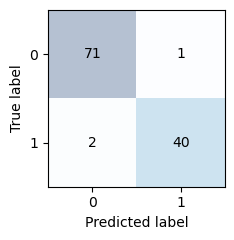

In [15]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
print(precision_score(y_true = y_test, y_pred = pipe_svc.predict(X_test)))
print(recall_score(y_true = y_test, y_pred = pipe_svc.predict(X_test)))
print(f1_score(y_true = y_test, y_pred = pipe_svc.predict(X_test)))
print(matthews_corrcoef(y_true = y_test, y_pred = pipe_svc.predict(X_test)))

0.975609756097561
0.9523809523809523
0.963855421686747
0.9433397594898876


In [17]:
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, pos_label = 0)
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv = 10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)


0.9880771478667446


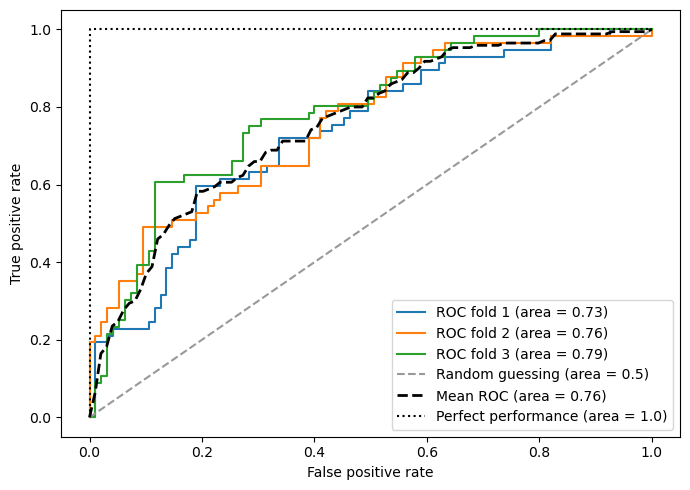

In [18]:
from sklearn.metrics import roc_curve, auc
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [21]:
pre_scorer = make_scorer(score_func=precision_score, pos_label = 0, greater_is_better=True, average = 'micro')
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv = 10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.9880771478667446


Class Imbalances:
If 90% of the dataset belong to one category, the precision score is not necessarily the optimal criterion for learning. Moreover, this imbalance leads to suboptimal learning progression.
Solution #1: activate class_weighted = 'balanced' (or assign a predefined dictionary {0:0.9, 1:0.1, ... })
Solution #2: Change the sampling with sklearn.utils.resample

In [32]:
print(sum(y))
print(sum(1-y))
print(X.shape)
print(y.shape[0])

212
357
(569, 30)
569


In [33]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))
y_imb.shape

(397,)

In [36]:
y_pred = np.zeros_like(y_imb)
np.mean(y_pred == y_imb) * 100

np.float64(89.92443324937027)

In [42]:
from sklearn.utils import resample
X_ups, y_ups = resample(X_imb[y_imb == 1], y_imb[y_imb == 1], replace=True, n_samples = X_imb[y_imb == 0].shape[0], random_state = 42)
print(X_ups.shape)
X_bal = np.vstack((X[y == 0], X_ups))
y_bal = np.hstack((y[y == 0], y_ups))

(357, 30)


In [44]:
X_dps, y_dps = resample(X_imb[y_imb == 0], y_imb[y_imb == 0], replace=True, n_samples = X_imb[y_imb == 1].shape[0], random_state = 42)
X_bal2 = np.vstack((X[y == 1], X_dps))
y_bal2 = np.hstack((y[y == 1], y_dps))

In [46]:
y_bal2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])